In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
from dolphin import io
import synth.plotting
import proplot as pplt
import scienceplots

plt.style.use(
    [
        "science",
        "nature",
        "bright",
    ]
)

color_cycle = plt.rcParams["axes.prop_cycle"]
colors = color_cycle.by_key()["color"]

plt.rcParams["image.cmap"] = "plasma"
import apertools.plotting
# apertools.plotting.set_style(size=16)

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
!ls sims/fast-decorrelation

compare_all.sh
create-configs.py
dolphin_config_defaults.yaml
dolphin_ms10_clip-0_hw-5-5_evd-false_beta0_compslc-always
dolphin_ms15_clip-0.05_hw-5-5_evd-false_beta0_compslc-always
dolphin_ms15_clip-0.1_hw-5-5_evd-false_beta0_compslc-always
dolphin_ms15_clip-0_hw-4-4_evd-false_beta0_compslc-always
dolphin_ms15_clip-0_hw-5-5_evd-false_beta0_compslc-always
dolphin_ms15_clip-0_hw-5-5_evd-false_beta0_compslc-first
dolphin_ms15_clip-0_hw-5-5_evd-false_beta1_compslc-always
dolphin_ms15_clip-0_hw-5-5_evd-false_beta2_compslc-always
dolphin_ms15_clip-0_hw-5-5_evd-true_beta0_compslc-always
dolphin_ms15_clip-0_hw-6-6_evd-false_beta0_compslc-always
dolphin_ms20_clip-0_hw-5-5_evd-false_beta0_compslc-always
dolphin_ms30_clip-0_hw-5-5_evd-false_beta0_compslc-always
input_layers
nearest-3-dolphin_ms10
nearest-3-dolphin_ms20
nearest-3-dolphin_ms30
nearest-3-dolphin_ms40
run_all.sh
slcs


/Users/staniewi/miniconda3/envs/mapping-311/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [8]:
paths = {
    num: Path("sims/fast-decorrelation/") / f"dolphin_ms{num}_clip-0_hw-5-5_evd-false_beta0_compslc-always"
    for num in [10, 20, 30]
}
dfs = {
    num: synth.plotting.process_coherence_data(val)
    for num, val in paths.items()
}

????????????
[PosixPath('sims/fast-decorrelation/dolphin_ms10_clip-0_hw-5-5_evd-false_beta0_compslc-always/linked_phase/20200101_20200418/similarity_20200101_20200418.tif'), PosixPath('sims/fast-decorrelation/dolphin_ms10_clip-0_hw-5-5_evd-false_beta0_compslc-always/linked_phase/20200430_20200816/similarity_20200430_20200816.tif'), PosixPath('sims/fast-decorrelation/dolphin_ms10_clip-0_hw-5-5_evd-false_beta0_compslc-always/linked_phase/20200828_20201214/similarity_20200828_20201214.tif'), PosixPath('sims/fast-decorrelation/dolphin_ms10_clip-0_hw-5-5_evd-false_beta0_compslc-always/linked_phase/20201226_20210413/similarity_20201226_20210413.tif'), PosixPath('sims/fast-decorrelation/dolphin_ms10_clip-0_hw-5-5_evd-false_beta0_compslc-always/linked_phase/20210425_20210811/similarity_20210425_20210811.tif'), PosixPath('sims/fast-decorrelation/dolphin_ms10_clip-0_hw-5-5_evd-false_beta0_compslc-always/linked_phase/20210823_20211209/similarity_20210823_20211209.tif'), PosixPath('sims/fast-decor

In [11]:
for df in dfs.values():
    print(df.describe())

temporal_coherence     similarity           rmse
count       337440.000000  321354.000000  337440.000000
mean             0.692115       0.883256       1.468186
std              0.087807       0.047118       0.226574
min              0.000000      -0.075717       0.732867
25%              0.678711       0.863330       1.304501
50%              0.701172       0.893447       1.466007
75%              0.723145       0.915143       1.628301
max              0.846191       0.973401       2.345382

temporal_coherence     similarity           rmse
count       337440.000000  321354.000000  337440.000000
mean             0.633619       0.740332       1.453193
std              0.087592       0.166385       0.262783
min              0.000000      -0.785124       0.688471
25%              0.609863       0.709260       1.250871
50%              0.642090       0.791003       1.445521
75%              0.673340       0.836833       1.638749
max              0.829102       0.928674       2.557468

temporal_coherence     similarity           rmse
count       337440.000000  321354.000000  337440.000000
mean             0.577778       0.542554       1.483400
std              0.083111       0.242132       0.283172
min              0.000000      -0.711649       0.727844
25%              0.552246       0.444493       1.261912
50%              0.585449       0.613821       1.467607
75%              0.617676       0.714050       1.689611
max              0.788086       0.900679       2.473762

findfont: Font family 'Helvetica' not found.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


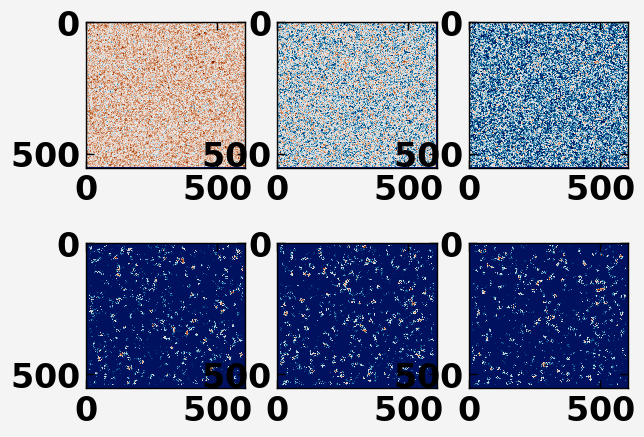

In [87]:
fig, axes = plt.subplots(nrows = 2, ncols=3)

for ax, p in zip(axes[0], paths.values()):
    ax.imshow(
        io.load_gdal(p / "interferograms/temporal_coherence.tif"), vmin=0.5
)
for ax, p in zip(axes[1], paths.values()):
    ax.imshow(
        io.load_gdal(p / "interferograms/similarity.tif"), vmin=0.5
)


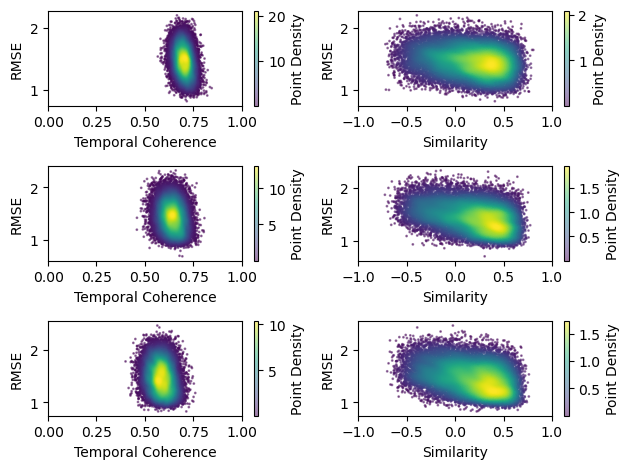

In [34]:
fig, axes = plt.subplots(nrows=len(dfs), ncols=2)
for cur_axes, n in zip(axes, dfs.keys()):
    synth.plotting.plot_coherence_analysis(dfs[n].iloc[::20, :], col="temporal_coherence", ax=cur_axes[0])
    synth.plotting.plot_coherence_analysis(dfs[n].iloc[::20, :], col="similarity", ax=cur_axes[1])

In [102]:
# plt.rcParams['font.family'] = 'Arial'

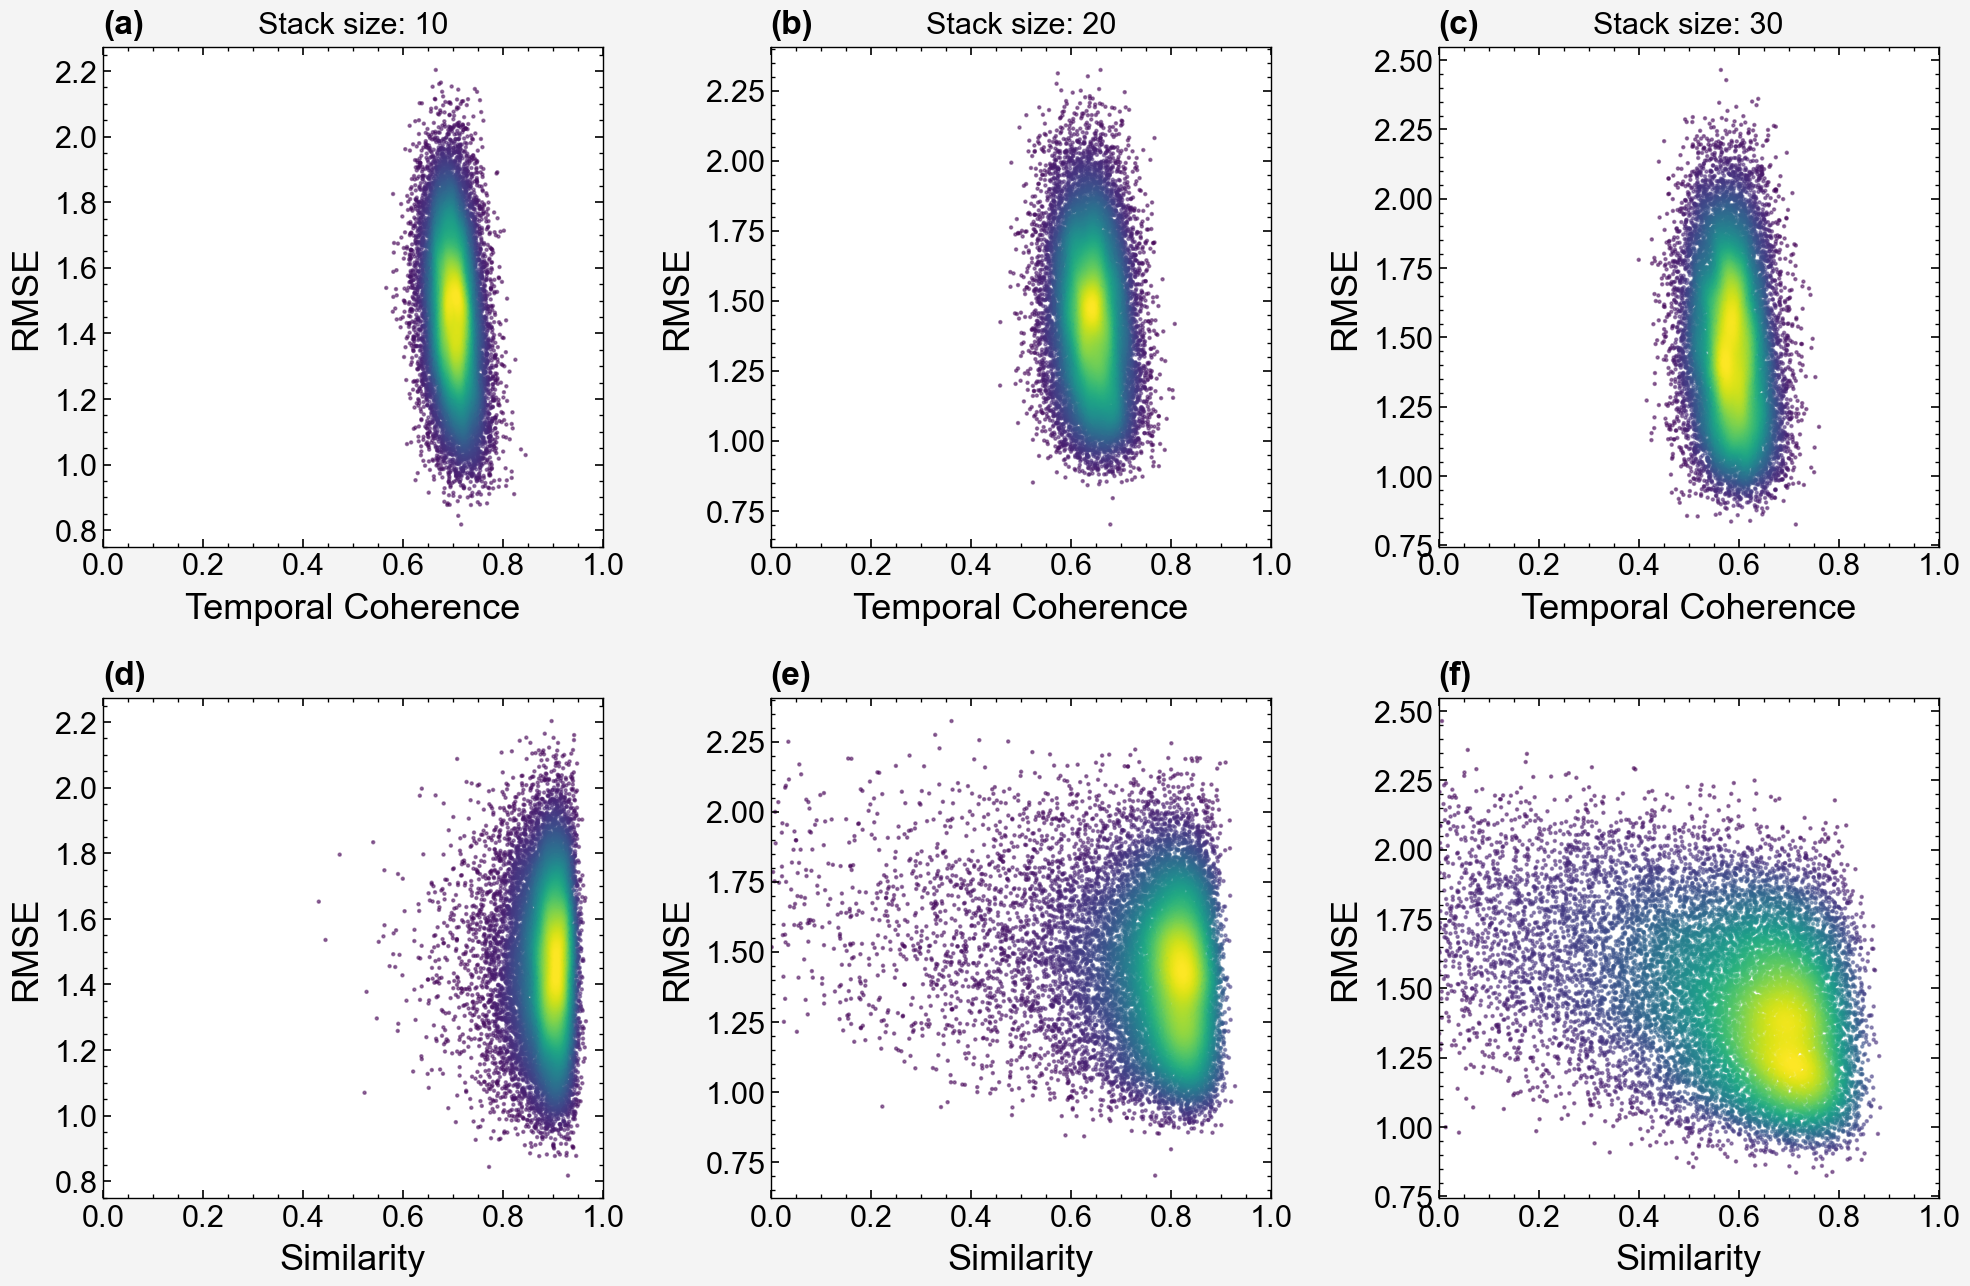

In [28]:
# fig, axes = plt.subplots(ncols=len(dfs), nrows=2)
fig, axes = pplt.subplots(nrows=2, ncols=len(dfs), abc="(a)", share=False)
for idx, n in enumerate(dfs.keys()):
    synth.plotting.plot_coherence_analysis(dfs[n].iloc[::20, :], col="temporal_coherence", ax=axes[0, idx])
    axes[idx].set_title(f"Stack size: {n}")

# fig, axes = pplt.subplots(nrows=1, ncols=len(dfs), abc="(c)")
for idx, n in enumerate(dfs.keys()):
    synth.plotting.plot_coherence_analysis(dfs[n].iloc[::20, :], col="similarity", ax=axes[1, idx])
    

## How does temporal coherence compare to similarity?

Reminder:
- Temporal coherence is (nearly) independent per pixel
- Similarity inherently is more correlated by checking surrounding pixel phases

In [24]:
# pplt.rc['font.size'] = 13
apertools.plotting.set_style(size=15)

In [ ]:
fig, axes = pplt.subplots(nrows=1, ncols=len(dfs), abc="(a)")
for idx, n in enumerate(dfs.keys()):
    synth.plotting.plot_quality_density(dfs[n].iloc[::, :], y_col="temporal_coherence", col="similarity", ax=axes[idx])
axes.format(xlim=(0, 1), ylim=(0, 1))

## How do simialrity and temporal coherence compare to true RMSE?

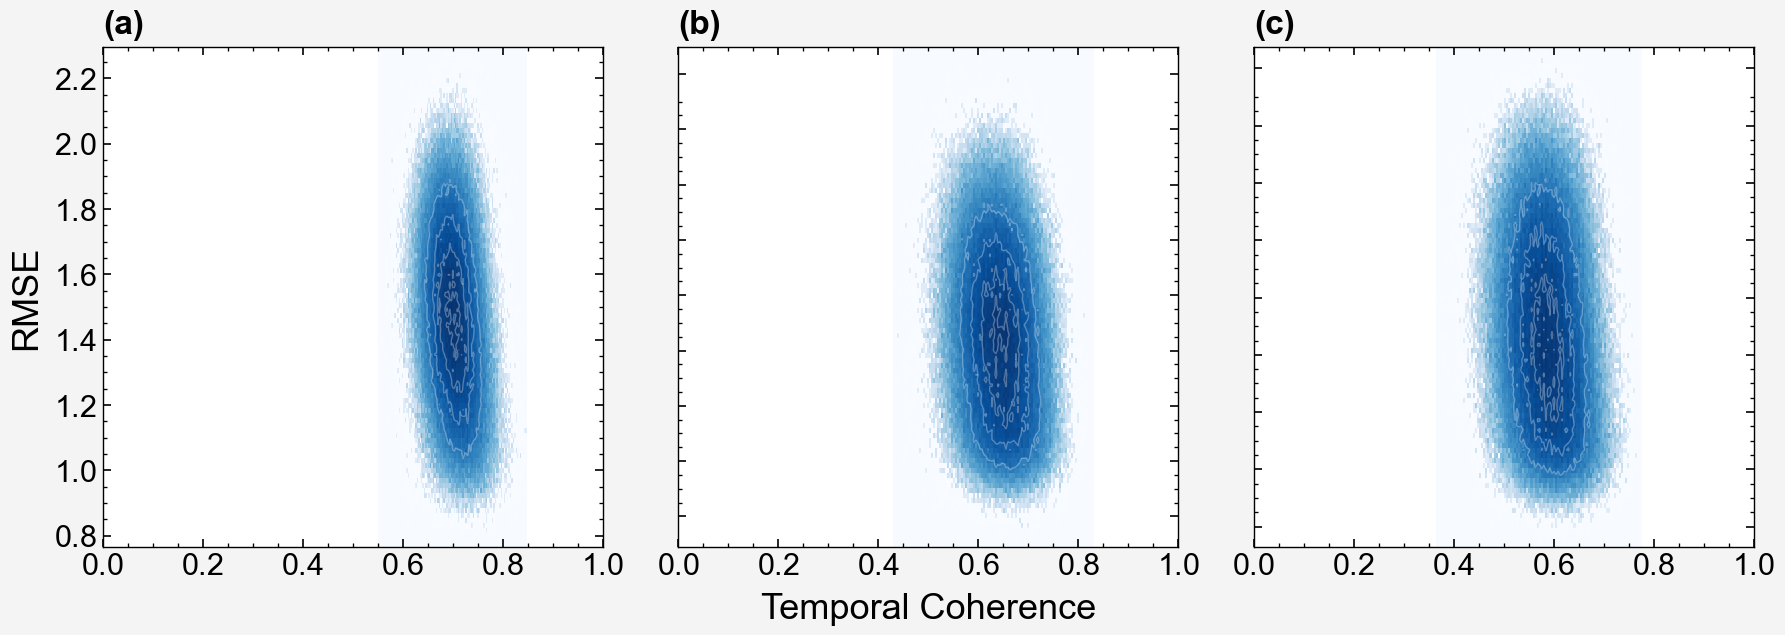

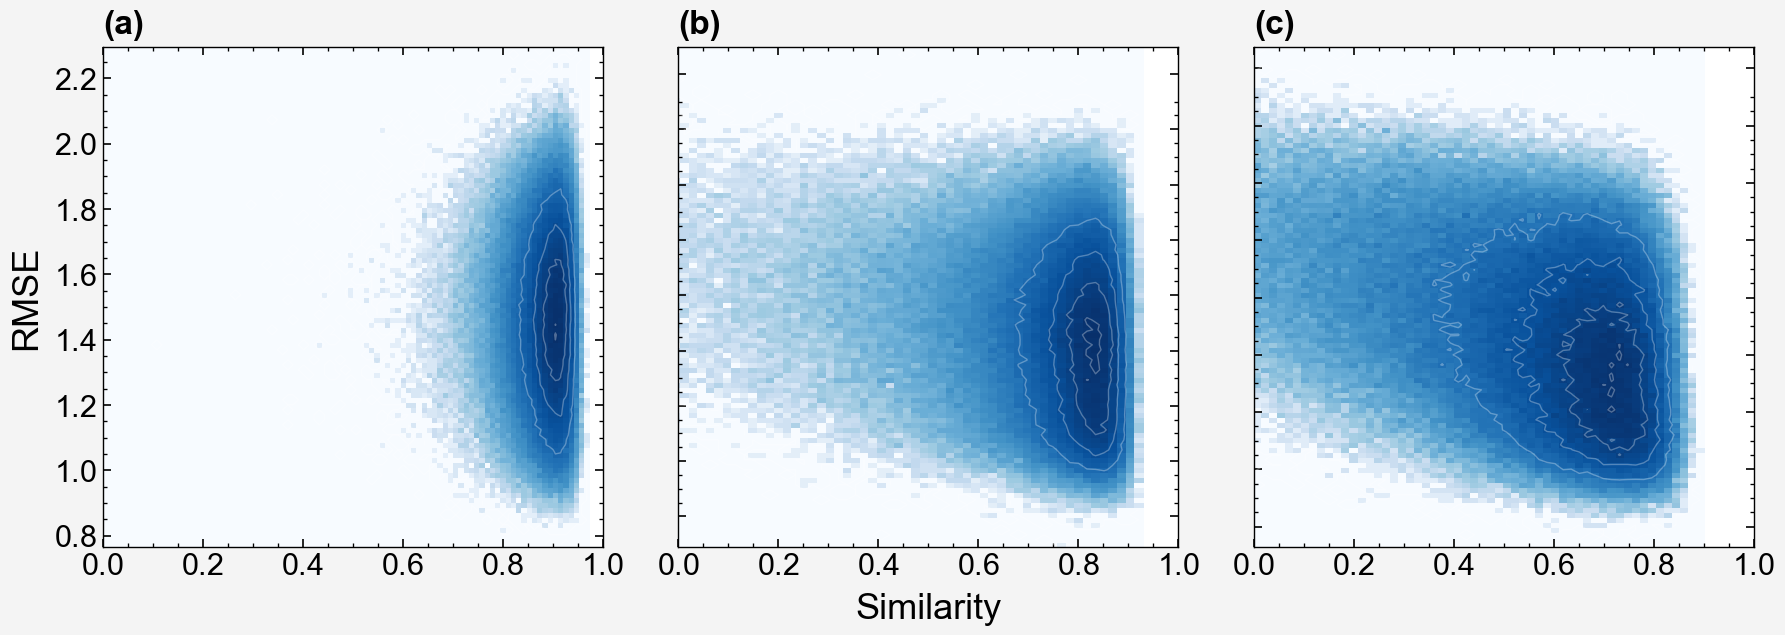

In [25]:
# fig, axes = plt.subplots(ncols=len(dfs), nrows=2)
fig, axes = pplt.subplots(nrows=1, ncols=len(dfs), abc="(a)")
for idx, n in enumerate(dfs.keys()):
    synth.plotting.plot_quality_density(dfs[n].iloc[::, :], col="temporal_coherence", ax=axes[idx])
axes.format(xlim=(0, 1))

fig, axes = pplt.subplots(nrows=1, ncols=len(dfs), abc="(a)")
for idx, n in enumerate(dfs.keys()):
    synth.plotting.plot_quality_density(dfs[n].iloc[::, :], col="similarity", ax=axes[idx])
axes.format(xlim=(0, 1))


# Nearest-3 results

In [91]:
paths3 = {
    num: Path("sims/fast-decorrelation/") / f"nearest-3-dolphin_ms{num}"
    for num in [10, 20, 30]
}
dfs3 = {
    num: synth.plotting.process_coherence_data(val)
    for num, val in paths3.items()
}

In [93]:
paths3.values()

dict_values([PosixPath('sims/fast-decorrelation/nearest-3-dolphin_ms10'), PosixPath('sims/fast-decorrelation/nearest-3-dolphin_ms20'), PosixPath('sims/fast-decorrelation/nearest-3-dolphin_ms30')])

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


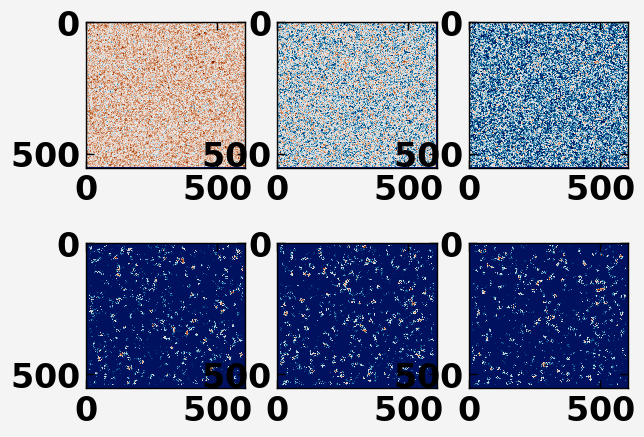

In [92]:
fig, axes = plt.subplots(nrows = 2, ncols=3)

for ax, p in zip(axes[0], paths3.values()):
    ax.imshow(
        io.load_gdal(p / "interferograms/temporal_coherence.tif"), vmin=0.5
)
for ax, p in zip(axes[1], paths3.values()):
    ax.imshow(
        io.load_gdal(p / "interferograms/similarity.tif"), vmin=0.5
)


In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols=3)

for ax, p in zip(axes[0], paths3.values()):
    ax.imshow(
        io.load_gdal(p / "interferograms/temporal_coherence.tif"), vmin=0.5
)
for ax, p in zip(axes[1], paths3.values()):
    ax.imshow(
        io.load_gdal(p / "interferograms/similarity.tif"), vmin=0.5
)


# Seasonal simulation

In [30]:
ms_sizes = [10, 15, 20, 30]
paths_seasonal = {
    num: Path("sims/seasonal/") / f"dolphin_ms{num}_clip-0_hw-5-5_evd-false_beta0_compslc-always"
    for num in ms_sizes
}
dfs_seasonal = {
    num: synth.plotting.process_coherence_data(val)
    for num, val in paths_seasonal.items()
}

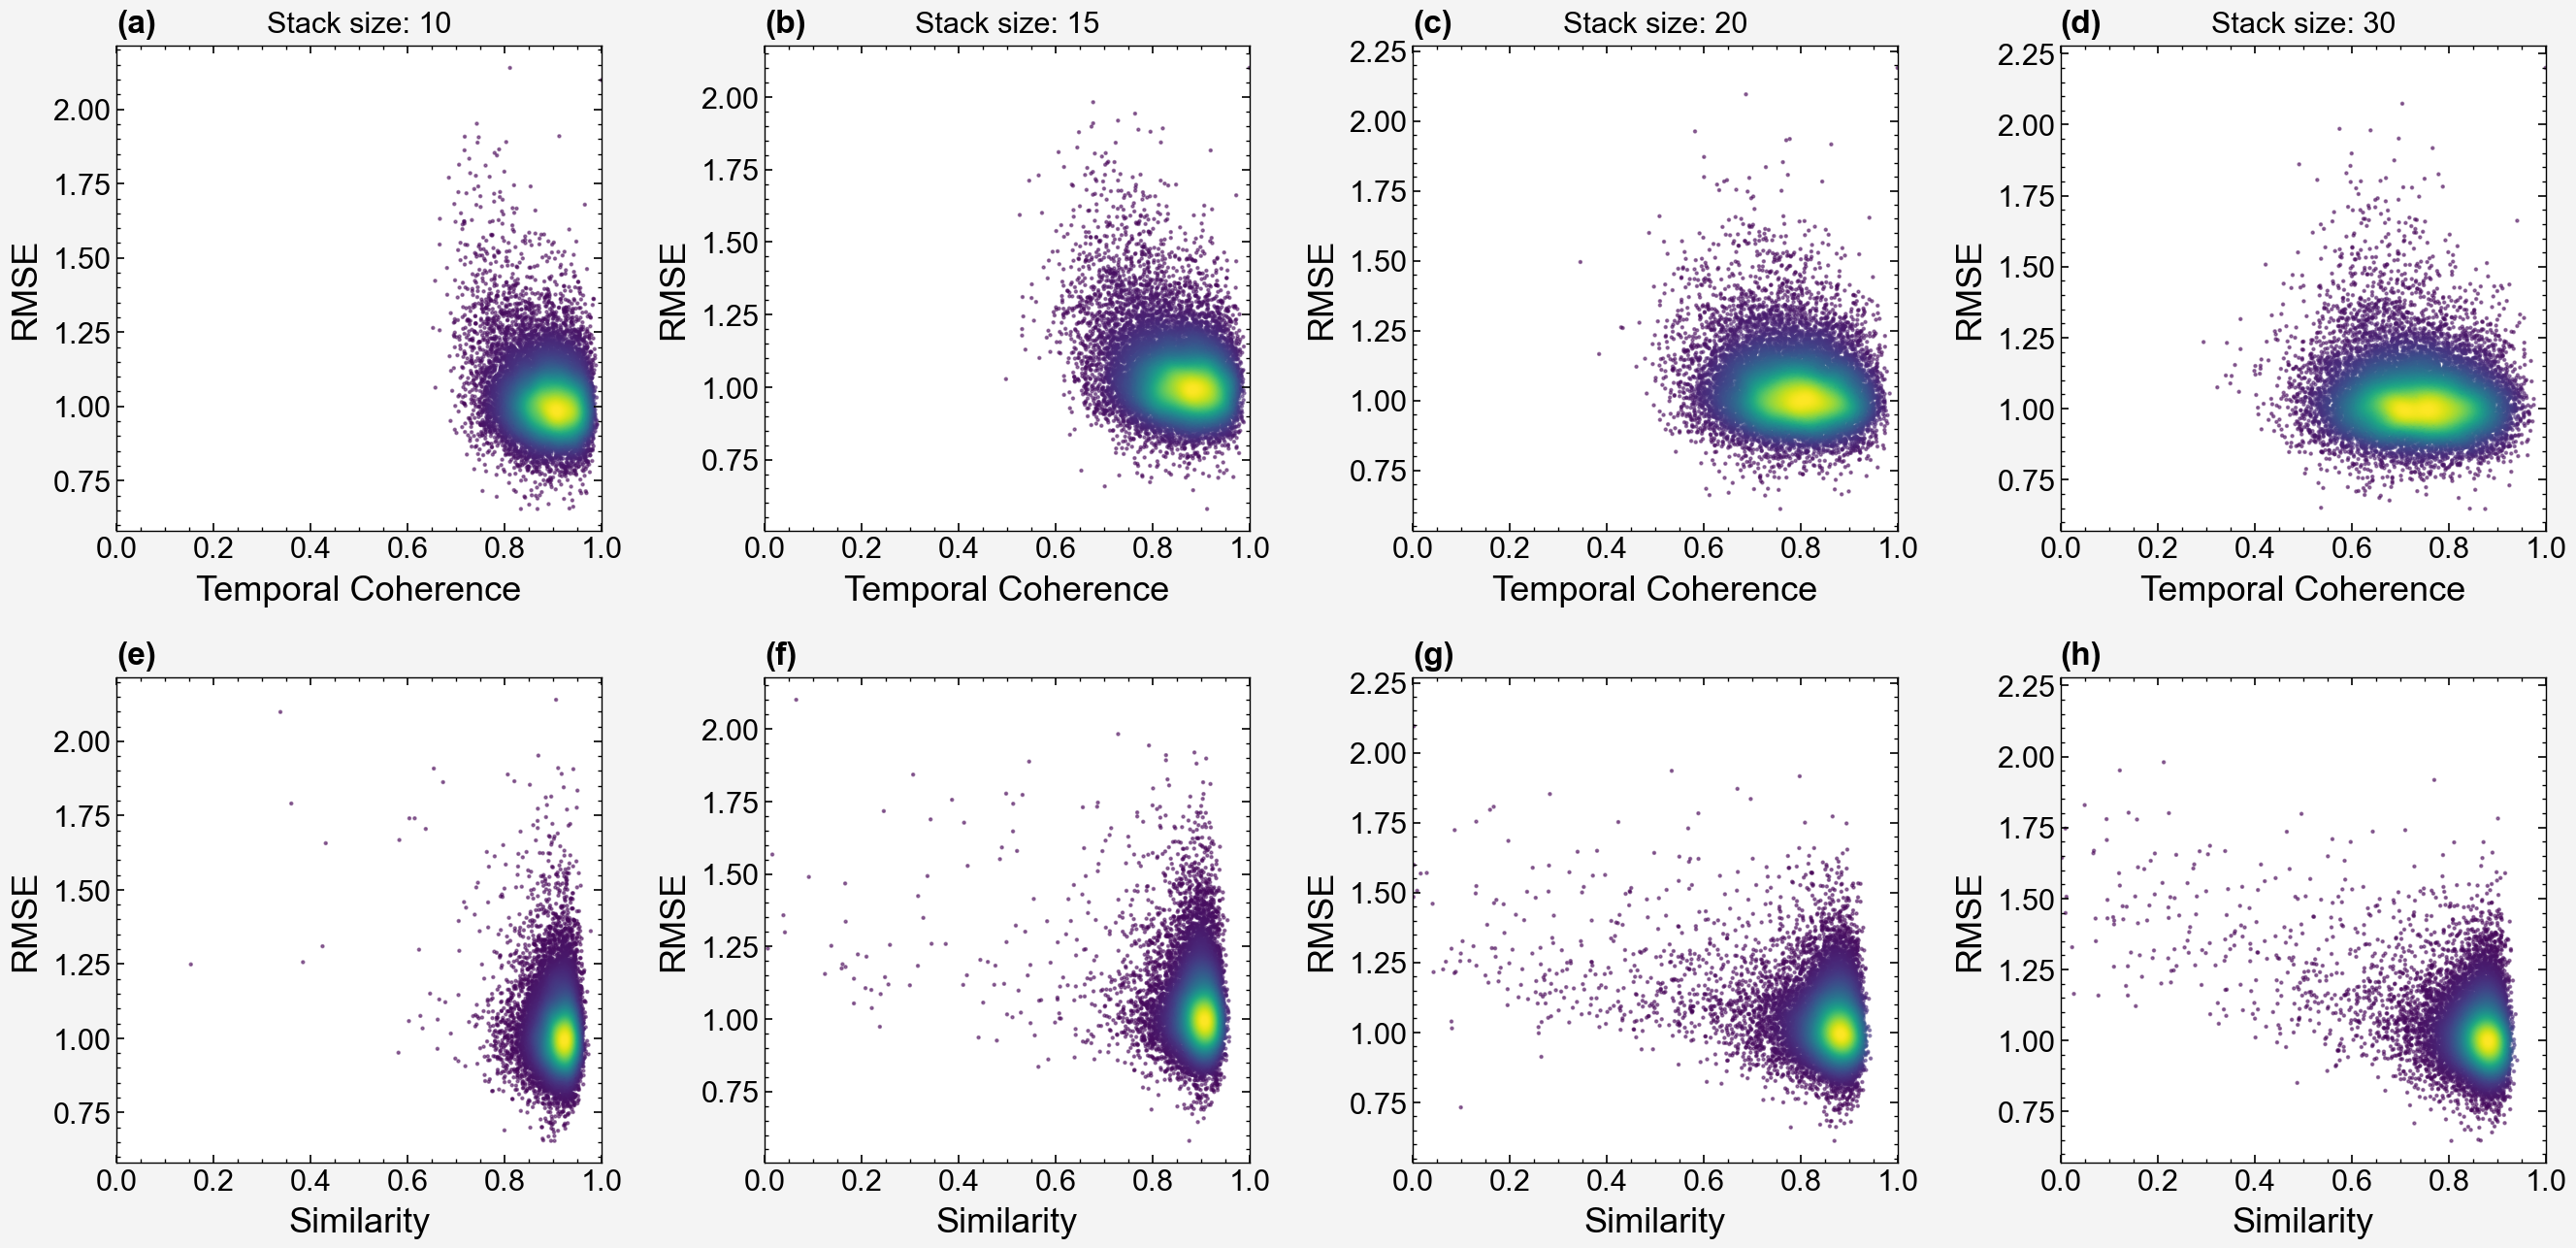

In [33]:
# fig, axes = plt.subplots(ncols=len(dfs), nrows=2)
fig, axes = pplt.subplots(nrows=2, ncols=len(dfs_seasonal), abc="(a)", share=False)
for idx, n in enumerate(dfs_seasonal.keys()):
    synth.plotting.plot_coherence_analysis(dfs_seasonal[n].iloc[::20, :], col="temporal_coherence", ax=axes[0, idx])
    axes[idx].set_title(f"Stack size: {n}")

# fig, axes = pplt.subplots(nrows=1, ncols=len(dfs), abc="(c)")
for idx, n in enumerate(dfs_seasonal.keys()):
    synth.plotting.plot_coherence_analysis(dfs_seasonal[n].iloc[::20, :], col="similarity", ax=axes[1, idx])
    

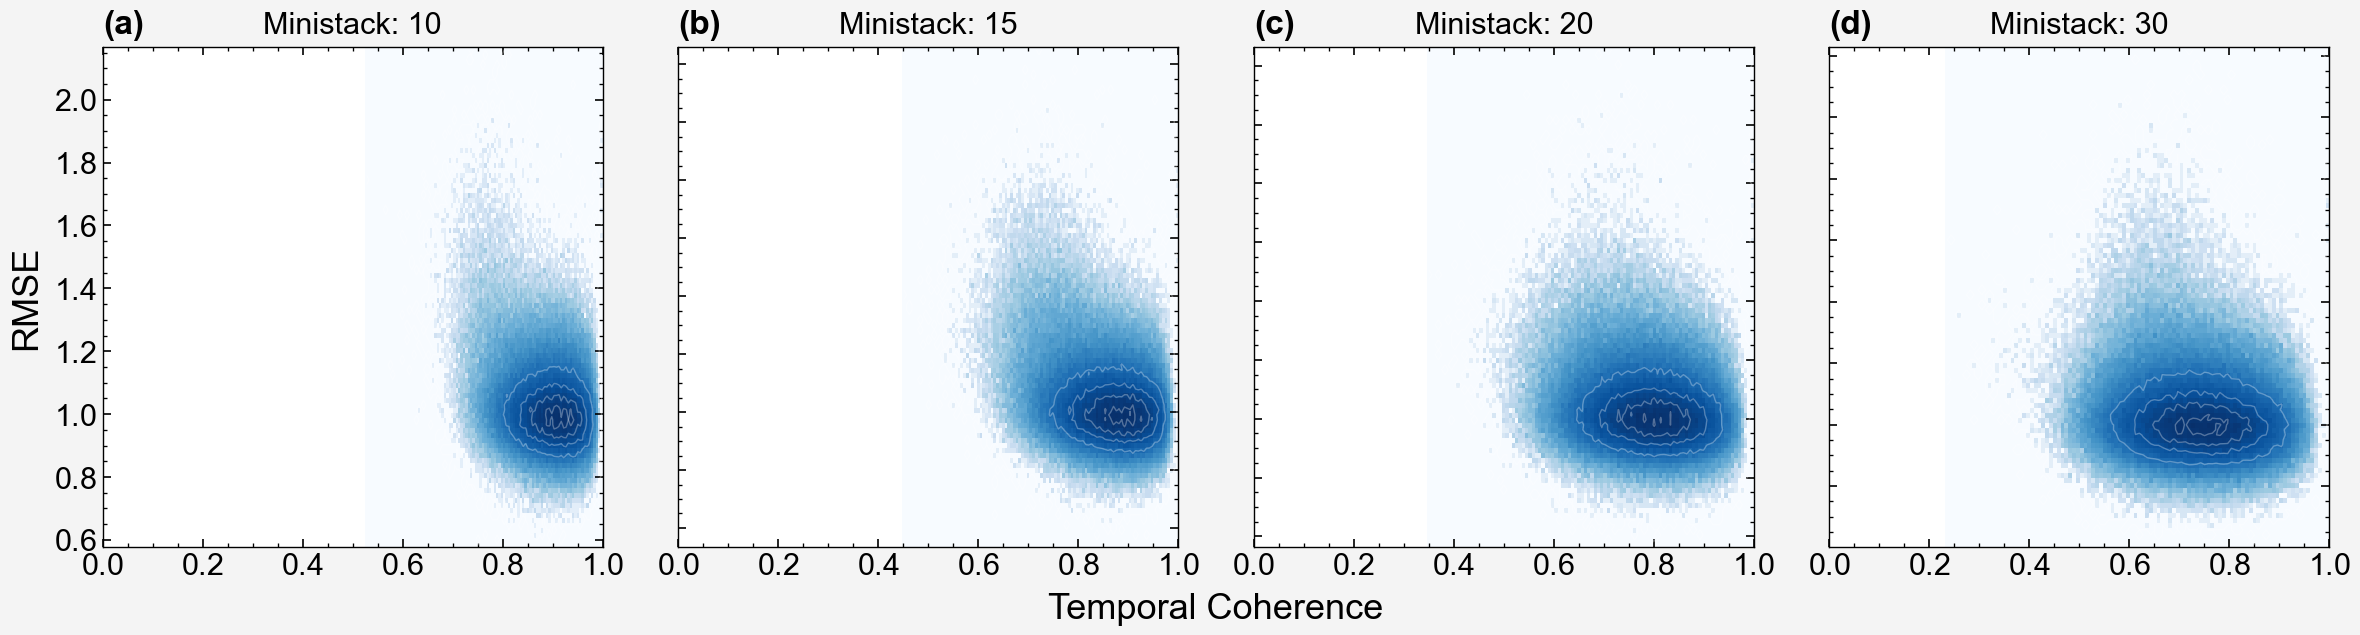

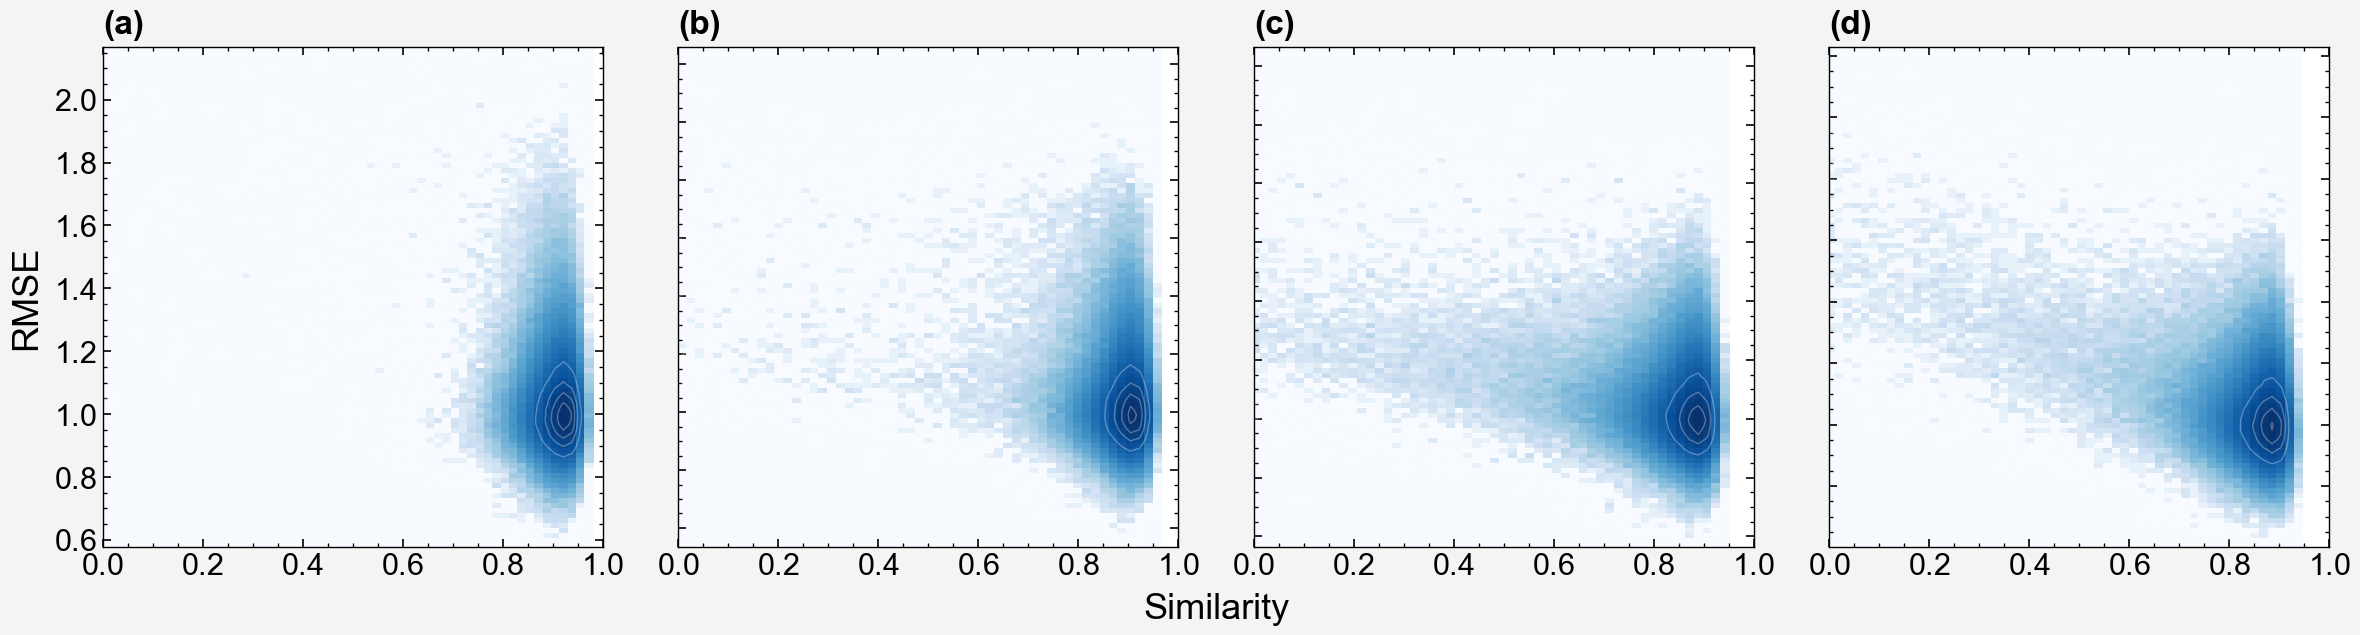

In [31]:
# fig, axes = plt.subplots(ncols=len(dfs), nrows=2)
fig, axes = pplt.subplots(nrows=1, ncols=len(dfs_seasonal), abc="(a)")
for idx, (n, df) in enumerate(dfs_seasonal.items()):
    synth.plotting.plot_quality_density(df.iloc[::, :], col="temporal_coherence", ax=axes[idx])
    axes[idx].set_title(f"Ministack: {ms_sizes[idx]}")
axes.format(xlim=(0, 1))

fig, axes = pplt.subplots(nrows=1, ncols=len(dfs_seasonal), abc="(a)")
for idx, (n, df) in enumerate(dfs_seasonal.items()):
    synth.plotting.plot_quality_density(df.iloc[::, :], col="similarity", ax=axes[idx])
axes.format(xlim=(0, 1))


In [42]:
(Path("sims/fast-decorrelation-50/") / f"dolphin_ms25_evd-false{exts[0]}").exists()

True

# Weighted Temporal

In [43]:
%pdb

Automatic pdb calling has been turned ON


In [ ]:
exts = ["", "-weighted-tcoh"]
paths_wtcoh = {
    f"{num}{ext}": Path("sims/fast-decorrelation-50/") / f"dolphin_ms{num}_evd-false{ext}"
    for num in [25, 50] for ext in exts
}
dfs_wtcoh = {
    num: synth.plotting.process_coherence_data(val)
    for num, val in paths_wtcoh.items()
}

ValueError: need at least one array to stack

> /Users/staniewi/miniconda3/envs/mapping-311/lib/python3.11/site-packages/numpy/core/shape_base.py(445)stack()
    443     arrays = [asanyarray(arr) for arr in arrays]
    444     if not arrays:
--> 445         raise ValueError('need at least one array to stack')
    446 
    447     shapes = {arr.shape for arr in arrays}



ipdb>  u


> /Users/staniewi/repos/dolphin/src/dolphin/io/_readers.py(420)_read_3d()
    418     # Get only the bands we need
    419     if num_threads == 1:
--> 420         out = np.stack([readers[i][r_slice, c_slice] for i in band_idxs], axis=0)
    421     else:
    422         with ThreadPoolExecutor(max_workers=num_threads) as executor:



ipdb>  u


> /Users/staniewi/repos/dolphin/src/dolphin/io/_readers.py(440)__getitem__()
    438 
    439     def __getitem__(self, key: tuple[Index, ...], /) -> np.ndarray:
--> 440         return _read_3d(key, self.readers, num_threads=self.num_threads)
    441 
    442     @property



ipdb>  


> /Users/staniewi/repos/synth/src/synth/plotting.py(59)process_coherence_data()
     57 
     58     # Process differences
---> 59     pixels = reader[:, :, :].reshape(reader.shape[0], -1)
     60     rmse_by_pixel = np.sqrt(np.mean(pixels * pixels.conj(), axis=0))
     61 



ipdb>  l


     54     sim = io.load_gdal(
     55         sorted(Path(main_dir / "linked_phase").rglob("similarity_*.tif"))[0]
     56     )
     57 
     58     # Process differences
---> 59     pixels = reader[:, :, :].reshape(reader.shape[0], -1)
     60     rmse_by_pixel = np.sqrt(np.mean(pixels * pixels.conj(), axis=0))
     61 
     62     # Create DataFrame
     63     df = pd.DataFrame(
     64         {



ipdb>  ll


     12 def process_coherence_data(directory: str | Path) -> pd.DataFrame:
     13     """Process InSAR coherence data from a directory and return analysis dataframe.
     14 
     15     Parameters
     16     ----------
     17     directory : str or Path
     18         Path to the directory containing the InSAR data with the following structure:
     19         - directory/
     20             - differences/*.tif
     21             - interferograms/temporal_coherence.tif
     22             - interferograms/similarity.tif
     23 
     24     Returns
     25     -------
     26     pd.DataFrame
     27         DataFrame containing columns:
     28         - temporal_coherence: Temporal coherence values for each pixel
     29         - similarity: Phase similarity values for each pixel
     30         - rmse: Root mean square error for each pixel
     31 
     32     Notes
     33     -----
     34     The function:
     35     1. Reads the difference files as a time series
     36

ipdb>  p directory


PosixPath('sims/fast-decorrelation-50/dolphin_ms25_evd-false')


ipdb>  p reader


RasterStackReader(file_list=[], readers=[], num_threads=1, nodata=None)
